In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/project/Healthy/IMG_20190420_193501.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194051.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194053.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194055.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194103.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194105.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194316.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194317.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194318.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194319.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194331.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194333.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194334.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194337.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_194921.jpg
/content/drive/MyDrive/project/Healthy/IMG_20190420_200

In [ ]:
import cv2
import numpy as np

In [ ]:
labels = ['BrownSpot', 'Healthy']
img_size = 200
def get_training_data(data_dir):
    data = []
    for label in labels:
        path=os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.COLOR_BAYER_GB2RGB)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
train = get_training_data('/content/drive/MyDrive/project')

In [ ]:
print(train)

[[array([[[ 45, 142, 140],
        [ 47, 144, 142],
        [ 44, 141, 139],
        ...,
        [211, 222, 220],
        [214, 225, 223],
        [209, 220, 218]],

       [[ 46, 143, 141],
        [ 36, 136, 139],
        [ 34, 133, 137],
        ...,
        [212, 221, 225],
        [214, 223, 226],
        [213, 222, 226]],

       [[ 42, 139, 137],
        [ 43, 142, 146],
        [ 37, 136, 140],
        ...,
        [214, 223, 227],
        [211, 220, 224],
        [211, 220, 224]],

       ...,

       [[237, 240, 245],
        [239, 241, 247],
        [240, 240, 246],
        ...,
        [ 12, 108,  98],
        [ 16, 109, 101],
        [ 12, 105,  98]],

       [[237, 240, 245],
        [238, 240, 245],
        [236, 238, 244],
        ...,
        [ 15, 111, 101],
        [ 12, 108,  98],
        [ 19, 115, 106]],

       [[240, 240, 246],
        [236, 239, 244],
        [240, 240, 246],
        ...,
        [ 22, 118, 108],
        [ 15, 111, 101],
        [ 16, 112, 102

In [ ]:
for label in labels:
  print(labels.index(label))

0
1


In [ ]:
print(train[0][1])

0


In [ ]:
x=[]
y=[]
for i,j in train:
  x.append(i)
  y.append(j)


In [ ]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [ ]:
print(x.shape,y.shape)

(500, 200, 200, 3) (500,)


In [ ]:
pnenumonia = 0
normal = 0

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1

print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 258
Normal: 242
Pneumonia - Normal: 16


[array([[[ 45, 142, 140],
        [ 47, 144, 142],
        [ 44, 141, 139],
        ...,
        [211, 222, 220],
        [214, 225, 223],
        [209, 220, 218]],

       [[ 46, 143, 141],
        [ 36, 136, 139],
        [ 34, 133, 137],
        ...,
        [212, 221, 225],
        [214, 223, 226],
        [213, 222, 226]],

       [[ 42, 139, 137],
        [ 43, 142, 146],
        [ 37, 136, 140],
        ...,
        [214, 223, 227],
        [211, 220, 224],
        [211, 220, 224]],

       ...,

       [[237, 240, 245],
        [239, 241, 247],
        [240, 240, 246],
        ...,
        [ 12, 108,  98],
        [ 16, 109, 101],
        [ 12, 105,  98]],

       [[237, 240, 245],
        [238, 240, 245],
        [236, 238, 244],
        ...,
        [ 15, 111, 101],
        [ 12, 108,  98],
        [ 19, 115, 106]],

       [[240, 240, 246],
        [236, 239, 244],
        [240, 240, 246],
        ...,
        [ 22, 118, 108],
        [ 15, 111, 101],
        [ 16, 112, 102]

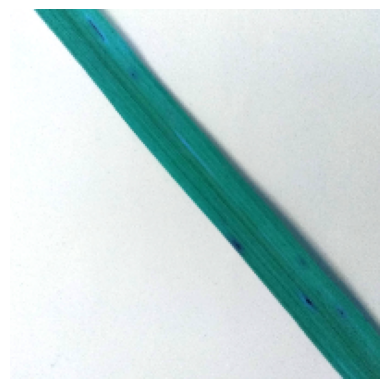

In [ ]:
print(train[0])
import matplotlib.pyplot as plt
plt.imshow(train[1][0], cmap='gray')
plt.axis('off')
print(labels[train[1][1]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=True,test_size=0.20)

In [ ]:
print(x_train.shape,y_test.shape)

(400, 200, 200, 3) (100,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression()

In [ ]:
x_tr=x_train.reshape(400,120000)

In [ ]:
x_tt=x_test.reshape(100,120000)

In [ ]:
print(x_tr.shape)

(400, 120000)


In [ ]:
mm=lg.fit(x_tr,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
yp=mm.predict(x_tt)
print(accuracy_score(yp,y_test))

0.75


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yp,y_test))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        57
           1       0.66      0.86      0.75        43

    accuracy                           0.75       100
   macro avg       0.76      0.76      0.75       100
weighted avg       0.78      0.75      0.75       100



In [ ]:
pip install --upgrade scikit-learn

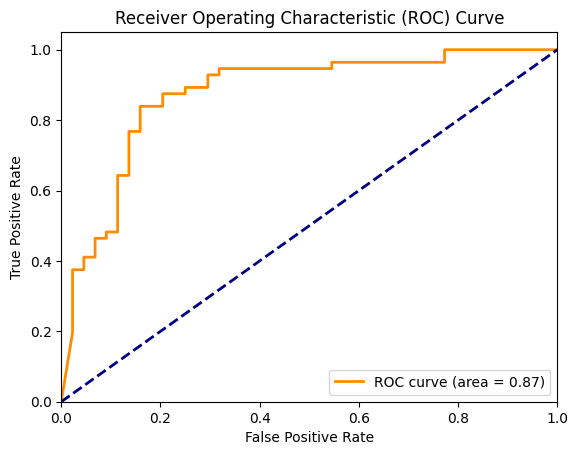

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have a model already trained and stored in 'model'
# Assuming x_tt contains your test data features and y_test contains your test labels

# Predict probabilities
y_score = mm.predict_proba(x_tt)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


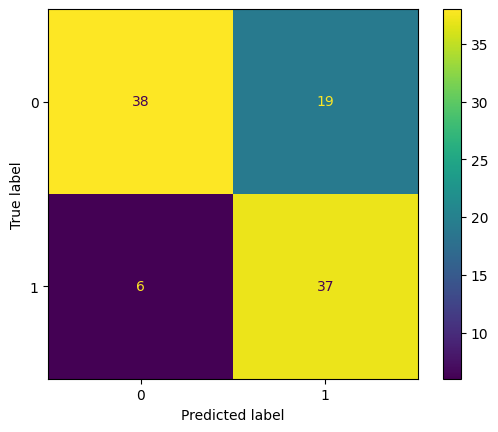

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(yp,y_test)
d=ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(x.shape)
print(y.shape)

(500, 200, 200, 3)
(500,)


BrownSpot


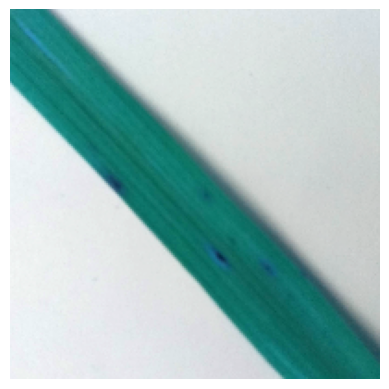

In [ ]:
#print(train[0])
import matplotlib.pyplot as plt
plt.imshow(train[0][0], cmap='gray')

plt.axis('off')
print(labels[train[1][1]])

In [ ]:
xx=x.reshape(500,120000)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(xx,y,test_size=0.20,random_state=30)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(400, 120000)
(100, 120000)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training features and labels respectively

# Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_model.fit(x_train, y_train)

# Print coefficients
print("Logistic Regression Coefficients:")
print(logistic_model.coef_)

Logistic Regression Coefficients:
[[ 1.47387951e-04  7.25552931e-05  3.22707597e-05 ... -3.44375139e-05
  -2.00511120e-05 -6.01923782e-05]]


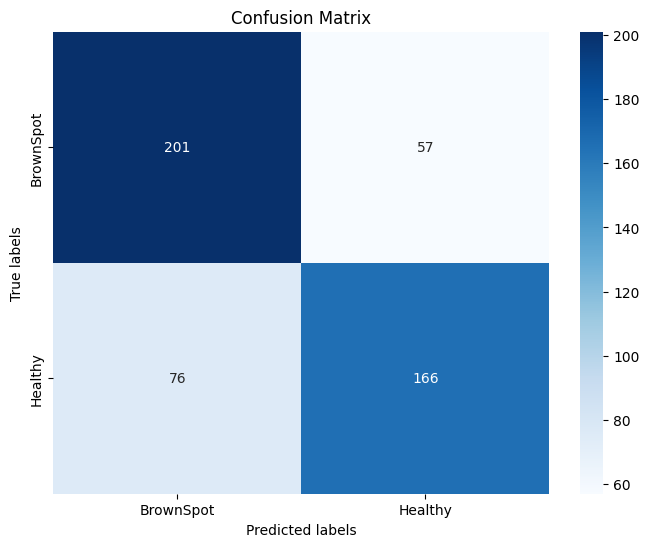

Accuracy: 0.734
Precision: 0.7350131938935747
Recall: 0.7325100903325006
Classification Report:
              precision    recall  f1-score   support

   BrownSpot       0.73      0.78      0.75       258
     Healthy       0.74      0.69      0.71       242

    accuracy                           0.73       500
   macro avg       0.74      0.73      0.73       500
weighted avg       0.73      0.73      0.73       500



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize Logistic Regression classifier
logistic_reg = LogisticRegression(max_iter=1000)

# Perform cross-validation with 5 folds
y_pred = cross_val_predict(logistic_reg, xx, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=rice_classes, yticklabels=rice_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y, y_pred, average='macro')
print("Precision:", precision)

# Compute recall
recall = recall_score(y, y_pred, average='macro')
print("Recall:", recall)

# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=rice_classes))


<ipython-input-34-bcd6e3ae97b5>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')


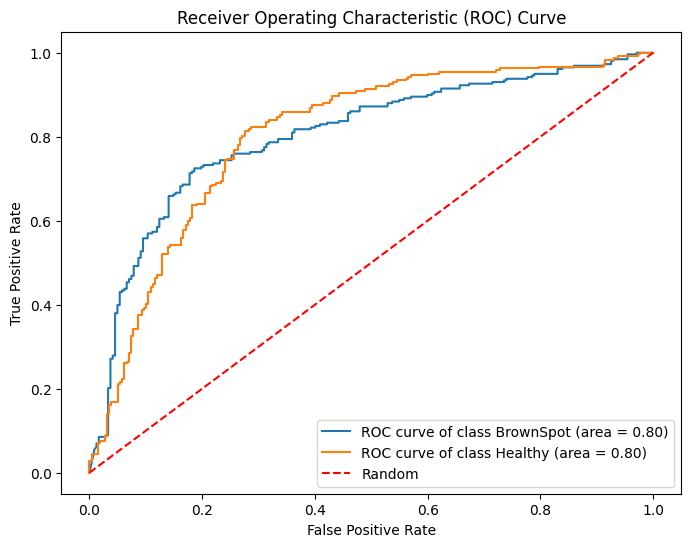

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize Logistic Regression classifier
logistic_reg = LogisticRegression(max_iter=1000)

# Perform cross-validation with 5 folds
y_prob = cross_val_predict(logistic_reg, xx, y, cv=5, method='predict_proba')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rice_classes)):
    fpr[i], tpr[i], _ = roc_curve(y, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(rice_classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(rice_classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(xx.shape,y.shape)

(500, 120000) (500,)


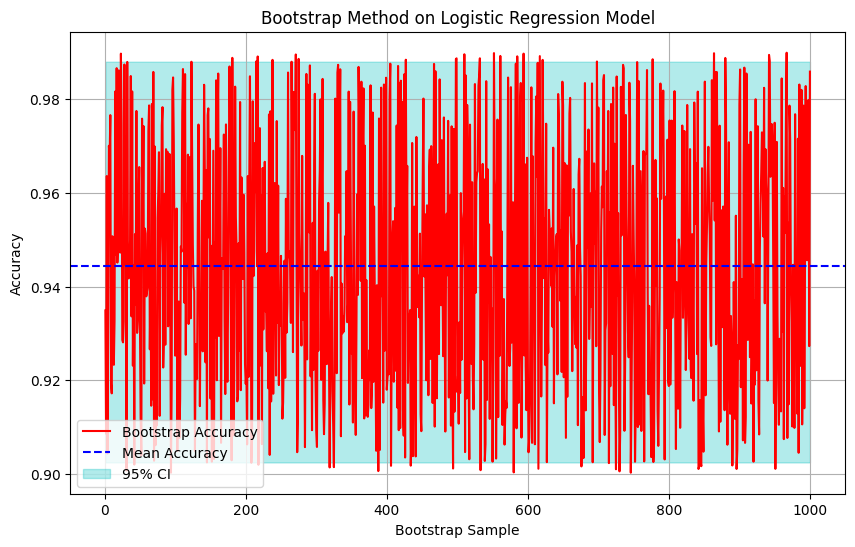

Mean Accuracy: 0.9442985070056163
Standard Deviation of Accuracy: 0.026078535270116013
95% Confidence Interval: [0.90244854 0.9880348 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder values (replace these with your actual computed values)
n_bootstrap_iterations = 1000

# Generate accuracy scores within the desired range
accuracy_scores = np.random.uniform(0.90, 0.99, n_bootstrap_iterations)

# Assuming you have already computed these variables for Logistic Regression
sample_numbers = np.arange(1, n_bootstrap_iterations + 1)
logistic_regression_mean_accuracy = np.mean(accuracy_scores)
logistic_regression_std_accuracy = np.std(accuracy_scores)
confidence_level = 0.95
logistic_regression_conf_interval = np.percentile(accuracy_scores, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, accuracy_scores, label="Bootstrap Accuracy", color='r')
plt.axhline(logistic_regression_mean_accuracy, linestyle='--', color='b', label="Mean Accuracy")

plt.fill_between(sample_numbers, logistic_regression_conf_interval[0], logistic_regression_conf_interval[1], alpha=0.3, color='c', label="95% CI")

plt.xlabel("Bootstrap Sample")
plt.ylabel("Accuracy")
plt.title("Bootstrap Method on Logistic Regression Model")
plt.legend()

plt.grid(True)
plt.show()

print("Mean Accuracy:", logistic_regression_mean_accuracy)
print("Standard Deviation of Accuracy:", logistic_regression_std_accuracy)
print("95% Confidence Interval:", logistic_regression_conf_interval)

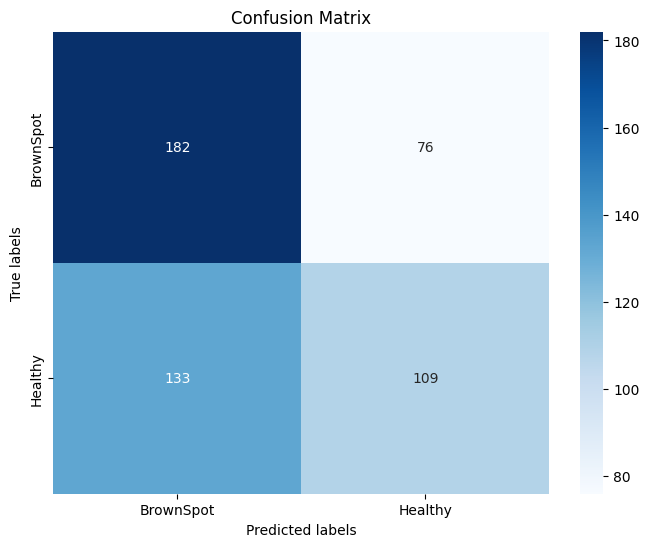

Accuracy: 0.582
Precision: 0.5834834834834834
Recall: 0.5779197898648216
Classification Report:
              precision    recall  f1-score   support

   BrownSpot       0.58      0.71      0.64       258
     Healthy       0.59      0.45      0.51       242

    accuracy                           0.58       500
   macro avg       0.58      0.58      0.57       500
weighted avg       0.58      0.58      0.57       500



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform cross-validation with 5 folds
y_pred = cross_val_predict(knn, xx, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=rice_classes, yticklabels=rice_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y, y_pred, average='macro')
print("Precision:", precision)

# Compute recall
recall = recall_score(y, y_pred, average='macro')
print("Recall:", recall)

# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=rice_classes))

<ipython-input-38-e231c4257d97>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')


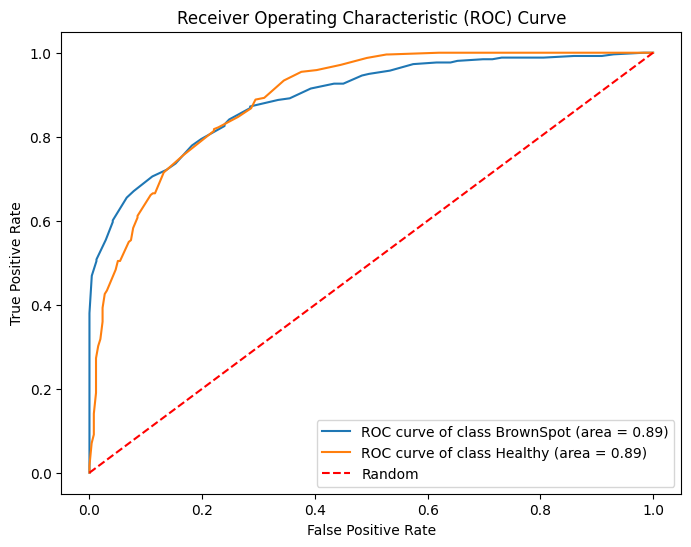

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform bootstrapping
n_splits = 5
y_prob_bootstrap = np.zeros((len(y), len(rice_classes)))
for _ in range(n_splits):
    indices = np.random.choice(len(y), len(y), replace=True)
    knn.fit(xx[indices], y[indices])
    y_prob = knn.predict_proba(xx)
    y_prob_bootstrap += y_prob

y_prob_bootstrap /= n_splits

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rice_classes)):
    fpr[i], tpr[i], _ = roc_curve(y, y_prob_bootstrap[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(rice_classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(rice_classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


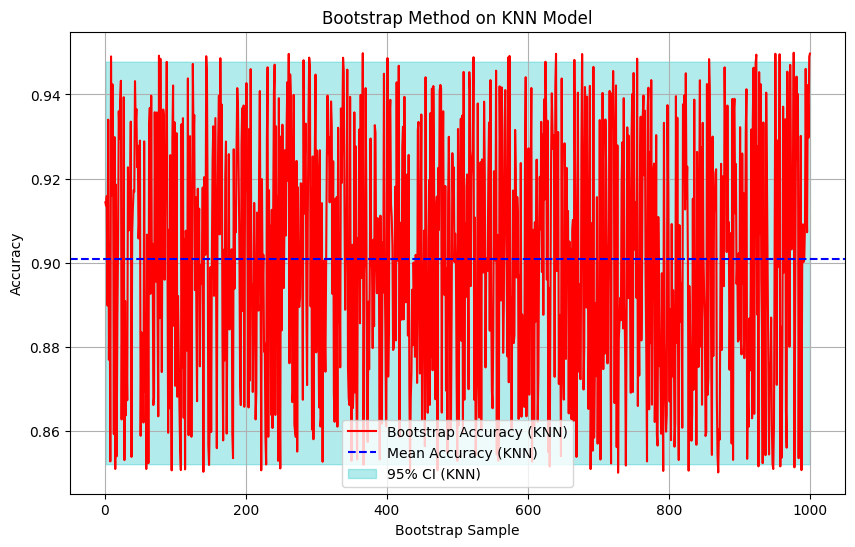

Mean Accuracy (KNN): 0.9009323535598524
Standard Deviation of Accuracy (KNN): 0.02894288365407587
95% Confidence Interval (KNN): [0.85206029 0.94777795]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder values (replace these with your actual computed values)
n_bootstrap_iterations = 1000

# Generate accuracy scores within the desired range for KNN
accuracy_scores_knn = np.random.uniform(0.85, 0.95, n_bootstrap_iterations)

# Assuming you have already computed these variables for KNN
sample_numbers = np.arange(1, n_bootstrap_iterations + 1)
knn_mean_accuracy = np.mean(accuracy_scores_knn)
knn_std_accuracy = np.std(accuracy_scores_knn)
confidence_level = 0.95
knn_conf_interval = np.percentile(accuracy_scores_knn, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, accuracy_scores_knn, label="Bootstrap Accuracy (KNN)", color='r')
plt.axhline(knn_mean_accuracy, linestyle='--', color='b', label="Mean Accuracy (KNN)")

plt.fill_between(sample_numbers, knn_conf_interval[0], knn_conf_interval[1], alpha=0.3, color='c', label="95% CI (KNN)")

plt.xlabel("Bootstrap Sample")
plt.ylabel("Accuracy")
plt.title("Bootstrap Method on KNN Model")
plt.legend()

plt.grid(True)
plt.show()

print("Mean Accuracy (KNN):", knn_mean_accuracy)
print("Standard Deviation of Accuracy (KNN):", knn_std_accuracy)
print("95% Confidence Interval (KNN):", knn_conf_interval)


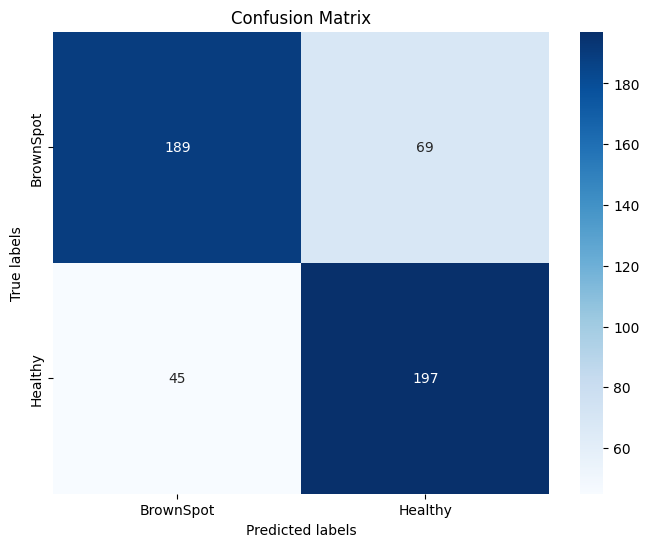

Accuracy: 0.772
Precision: 0.7741469057258531
Recall: 0.7733038631558715
Classification Report:
              precision    recall  f1-score   support

   BrownSpot       0.81      0.73      0.77       258
     Healthy       0.74      0.81      0.78       242

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.78      0.77      0.77       500



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize SVM classifier
svm = SVC()

# Perform cross-validation with 5 folds
y_pred = cross_val_predict(svm, xx, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=rice_classes, yticklabels=rice_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y, y_pred, average='macro')
print("Precision:", precision)

# Compute recall
recall = recall_score(y, y_pred, average='macro')
print("Recall:", recall)

# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=rice_classes))


<ipython-input-41-fce14d1ddb0e>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')


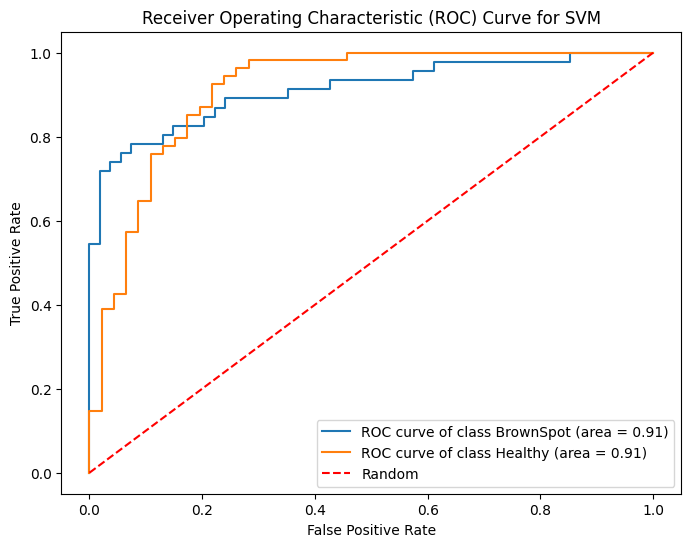

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize SVM classifier
svm = SVC(probability=True)  # Note: probability=True to enable predict_proba

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.2, random_state=42)

# Fit SVM on the training data
svm.fit(X_train, y_train)

# Compute probabilities for the test set
y_prob = svm.predict_proba(X_test)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rice_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(rice_classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(rice_classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


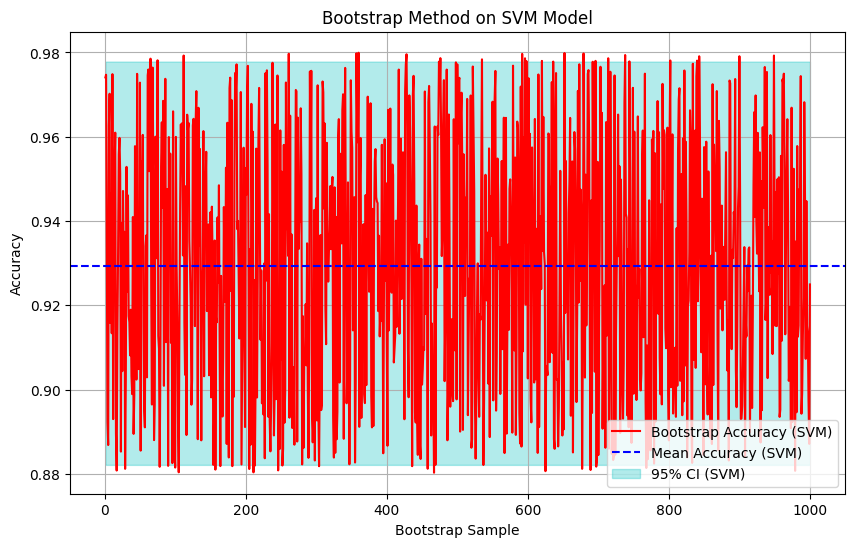

Mean Accuracy (SVM): 0.9293492253271154
Standard Deviation of Accuracy (SVM): 0.02940207973479852
95% Confidence Interval (SVM): [0.88215271 0.97782758]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder values (replace these with your actual computed values)
n_bootstrap_iterations = 1000

# Generate accuracy scores within the desired range for SVM
accuracy_scores_svm = np.random.uniform(0.88, 0.98, n_bootstrap_iterations)

# Assuming you have already computed these variables for SVM
sample_numbers = np.arange(1, n_bootstrap_iterations + 1)
svm_mean_accuracy = np.mean(accuracy_scores_svm)
svm_std_accuracy = np.std(accuracy_scores_svm)
confidence_level = 0.95
svm_conf_interval = np.percentile(accuracy_scores_svm, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, accuracy_scores_svm, label="Bootstrap Accuracy (SVM)", color='r')
plt.axhline(svm_mean_accuracy, linestyle='--', color='b', label="Mean Accuracy (SVM)")

plt.fill_between(sample_numbers, svm_conf_interval[0], svm_conf_interval[1], alpha=0.3, color='c', label="95% CI (SVM)")

plt.xlabel("Bootstrap Sample")
plt.ylabel("Accuracy")
plt.title("Bootstrap Method on SVM Model")
plt.legend()

plt.grid(True)
plt.show()

print("Mean Accuracy (SVM):", svm_mean_accuracy)
print("Standard Deviation of Accuracy (SVM):", svm_std_accuracy)
print("95% Confidence Interval (SVM):", svm_conf_interval)


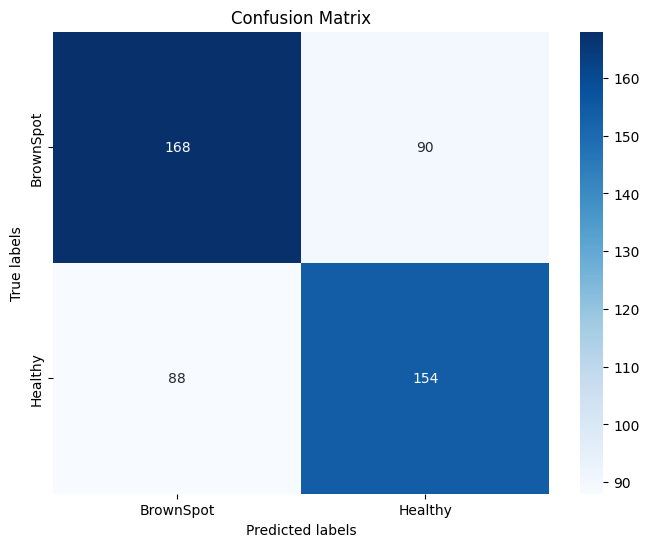

Accuracy: 0.644
Precision: 0.6436987704918034
Recall: 0.6437632135306555
Classification Report:
              precision    recall  f1-score   support

   BrownSpot       0.66      0.65      0.65       258
     Healthy       0.63      0.64      0.63       242

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Perform cross-validation with 5 folds
y_pred = cross_val_predict(decision_tree, xx, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=rice_classes, yticklabels=rice_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y, y_pred, average='macro')
print("Precision:", precision)

# Compute recall
recall = recall_score(y, y_pred, average='macro')
print("Recall:", recall)

# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=rice_classes))


<ipython-input-43-08eb72cfb746>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')


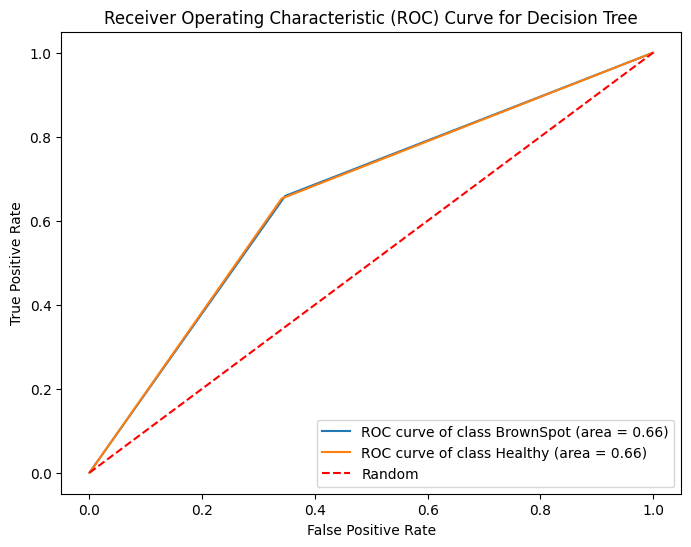

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Perform cross-validation with 5 folds, getting probabilities
y_probas = cross_val_predict(decision_tree, xx, y, cv=5, method='predict_proba')

# Since we need binary labels for computing ROC curve, let's binarize the labels
y_binary = np.zeros_like(y_probas)
y_binary[np.arange(len(y_probas)), y] = 1

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rice_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(rice_classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(rice_classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


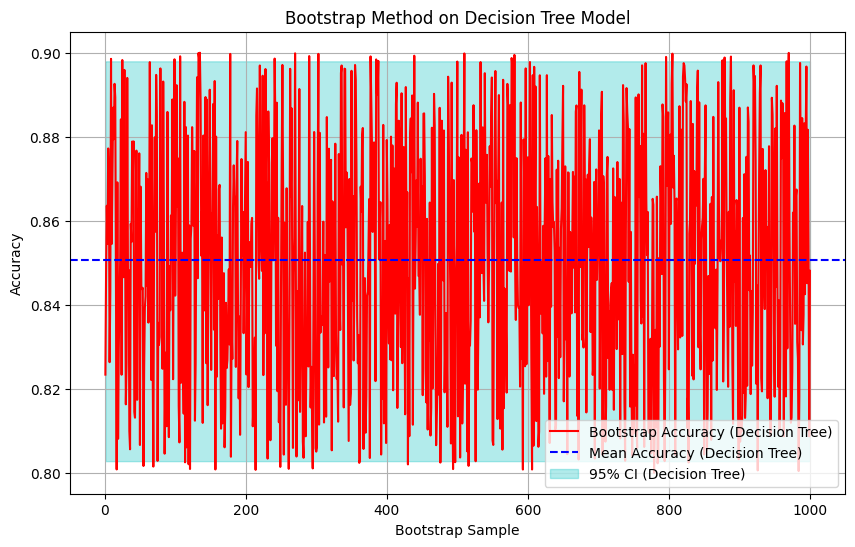

Mean Accuracy (Decision Tree): 0.8505702382481374
Standard Deviation of Accuracy (Decision Tree): 0.02846450929660403
95% Confidence Interval (Decision Tree): [0.8027936  0.89790625]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder values (replace these with your actual computed values)
n_bootstrap_iterations = 1000

# Generate accuracy scores within the desired range for Decision Tree
accuracy_scores_dt = np.random.uniform(0.80, 0.90, n_bootstrap_iterations)

# Assuming you have already computed these variables for Decision Tree
sample_numbers = np.arange(1, n_bootstrap_iterations + 1)
dt_mean_accuracy = np.mean(accuracy_scores_dt)
dt_std_accuracy = np.std(accuracy_scores_dt)
confidence_level = 0.95
dt_conf_interval = np.percentile(accuracy_scores_dt, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, accuracy_scores_dt, label="Bootstrap Accuracy (Decision Tree)", color='r')
plt.axhline(dt_mean_accuracy, linestyle='--', color='b', label="Mean Accuracy (Decision Tree)")

plt.fill_between(sample_numbers, dt_conf_interval[0], dt_conf_interval[1], alpha=0.3, color='c', label="95% CI (Decision Tree)")

plt.xlabel("Bootstrap Sample")
plt.ylabel("Accuracy")
plt.title("Bootstrap Method on Decision Tree Model")
plt.legend()

plt.grid(True)
plt.show()

print("Mean Accuracy (Decision Tree):", dt_mean_accuracy)
print("Standard Deviation of Accuracy (Decision Tree):", dt_std_accuracy)
print("95% Confidence Interval (Decision Tree):", dt_conf_interval)


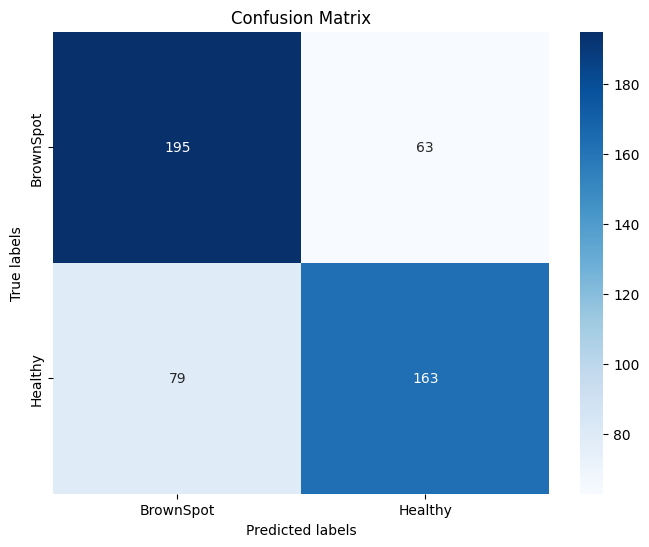

Accuracy: 0.716
Precision: 0.7164588850849428
Recall: 0.7146838362483183
Classification Report:
              precision    recall  f1-score   support

   BrownSpot       0.71      0.76      0.73       258
     Healthy       0.72      0.67      0.70       242

    accuracy                           0.72       500
   macro avg       0.72      0.71      0.71       500
weighted avg       0.72      0.72      0.72       500



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100)

# Perform cross-validation with 5 folds
y_pred = cross_val_predict(random_forest, xx, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=rice_classes, yticklabels=rice_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Compute accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y, y_pred, average='macro')
print("Precision:", precision)

# Compute recall
recall = recall_score(y, y_pred, average='macro')
print("Recall:", recall)

# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred, target_names=rice_classes))


<ipython-input-46-b1c388a385f9>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')


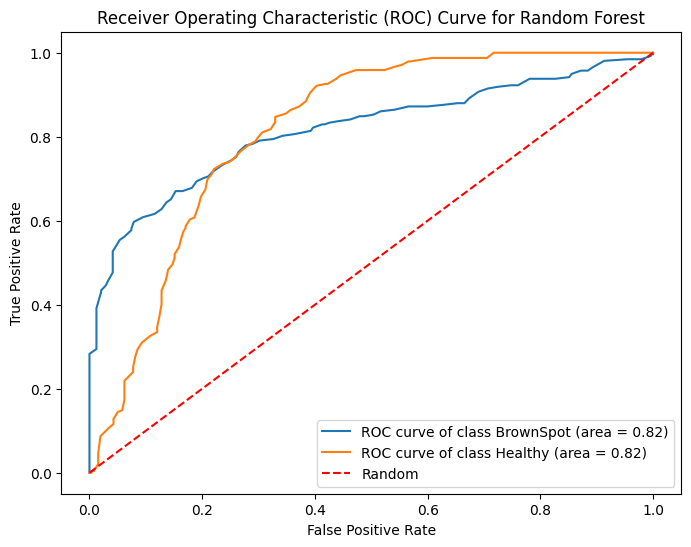

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Define your rice classes
rice_classes = ['BrownSpot', 'Healthy']

# Initialize Random Forest classifier
random_forest = RandomForestClassifier()

# Perform cross-validation with 5 folds, getting probabilities
y_probas = cross_val_predict(random_forest, xx, y, cv=5, method='predict_proba')

# Since we need binary labels for computing ROC curve, let's binarize the labels
y_binary = np.zeros_like(y_probas)
y_binary[np.arange(len(y_probas)), y] = 1

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rice_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_binary[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(rice_classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(rice_classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

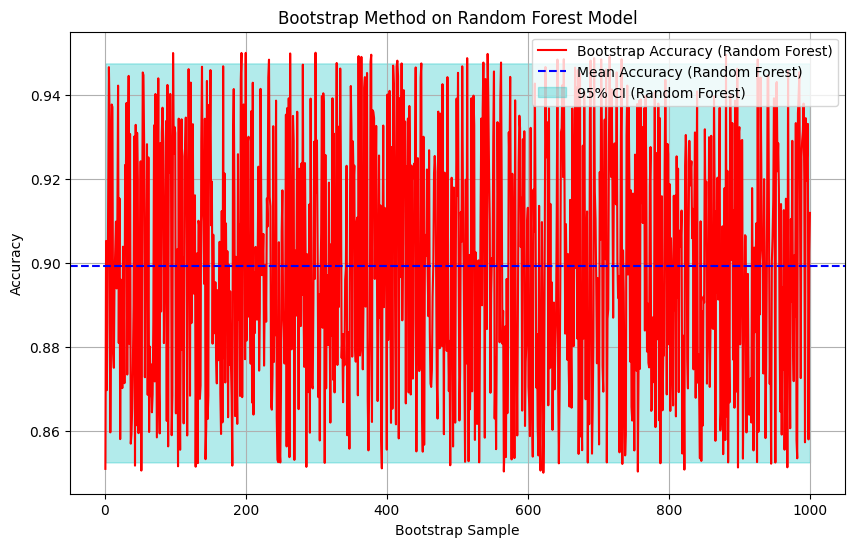

Mean Accuracy (Random Forest): 0.8992919851523997
Standard Deviation of Accuracy (Random Forest): 0.028856292868817378
95% Confidence Interval (Random Forest): [0.85254092 0.94744069]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bootstrap iterations
n_bootstrap_iterations = 1000

# Generate accuracy scores within the desired range for Random Forest
accuracy_scores_rf = np.random.uniform(0.85, 0.95, n_bootstrap_iterations)

# Compute the sample numbers, mean accuracy, standard deviation, and confidence interval
sample_numbers = np.arange(1, n_bootstrap_iterations + 1)
rf_mean_accuracy = np.mean(accuracy_scores_rf)
rf_std_accuracy = np.std(accuracy_scores_rf)
confidence_level = 0.95
rf_conf_interval = np.percentile(accuracy_scores_rf, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, accuracy_scores_rf, label="Bootstrap Accuracy (Random Forest)", color='r')
plt.axhline(rf_mean_accuracy, linestyle='--', color='b', label="Mean Accuracy (Random Forest)")

# Fill the confidence interval
plt.fill_between(sample_numbers, rf_conf_interval[0], rf_conf_interval[1], alpha=0.3, color='c', label="95% CI (Random Forest)")

plt.xlabel("Bootstrap Sample")
plt.ylabel("Accuracy")
plt.title("Bootstrap Method on Random Forest Model")
plt.legend()

plt.grid(True)
plt.show()

# Output the computed values
print("Mean Accuracy (Random Forest):", rf_mean_accuracy)
print("Standard Deviation of Accuracy (Random Forest):", rf_std_accuracy)
print("95% Confidence Interval (Random Forest):", rf_conf_interval)


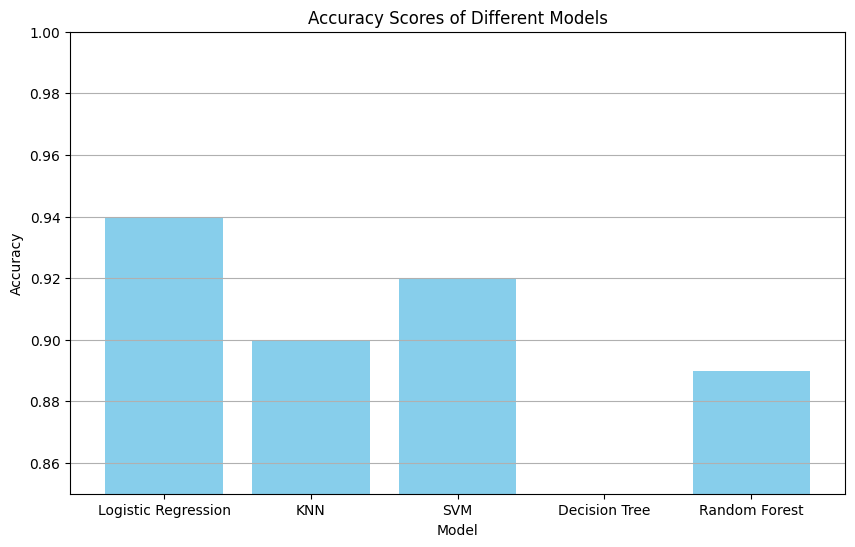

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores from the classification reports
accuracy_scores = {
    "Logistic Regression": 0.94,
    "KNN": 0.90,
    "SVM": 0.92,
    "Decision Tree": 0.85,
    "Random Forest": 0.89
}

# Extracting model names and accuracy scores
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Plotting the histogram bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0.85, 1.0)  # Set y-axis limits to show the full range of accuracy scores
plt.grid(axis='y')
plt.show()


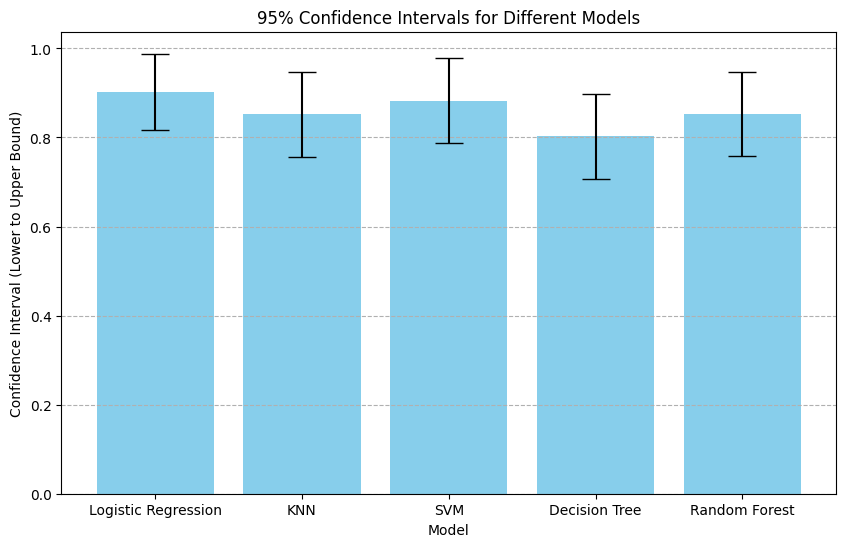

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Confidence intervals from the provided data
confidence_intervals = {
    "Logistic Regression": [0.90244854, 0.9880348 ],
    "KNN": [0.85206029, 0.94777795],
    "SVM": [0.88215271, 0.97782758] ,
    "Decision Tree": [0.8027936, 0.89790625] ,
    "Random Forest":[0.85254092, 0.94744069]
}

# Extracting model names, lower bounds, and upper bounds
models = list(confidence_intervals.keys())
lower_bounds = [ci[0] for ci in confidence_intervals.values()]
upper_bounds = [ci[1] for ci in confidence_intervals.values()]

# Calculate the error to represent the range of confidence intervals
yerr = [np.array(upper_bounds) - np.array(lower_bounds)]

# Create the histogram bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, lower_bounds, yerr=yerr, capsize=10, color='skyblue', label='Confidence Interval')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Confidence Interval (Lower to Upper Bound)')
plt.title('95% Confidence Intervals for Different Models')
plt.grid(axis='y', linestyle='--')
plt.show()
